## Part 1
* I'm working with **ChatGPT** to create a plan for a carbon footprint calculator hackathon.

* Here is a link to the conversation I've been having with ChatGPT: https://chatgpt.com/share/67ec48b5-a94c-8006-9933-179ec1f81699


* Below is some Python code that gets us started with the carbon footprint calculator. Learn more about the Python programming language here: https://www.earthdatascience.org/courses/intro-to-earth-data-science/

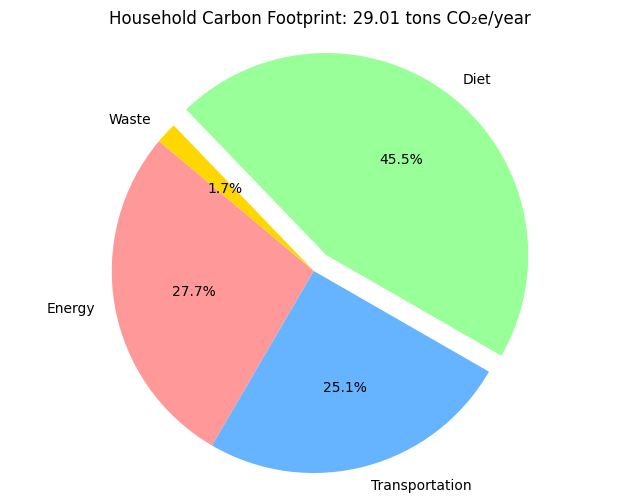

In [10]:
import matplotlib.pyplot as plt

# Input data
household_data = {
    "electricity_kwh_per_month": 900,
    "natural_gas_therms_per_month": 50,
    "miles_driven_per_year": 15000,
    "car_mpg": 25,
    "flights_per_year": 2,
    "flight_distance_miles": 1000,
    "household_size": 4,
    "diet_type_emissions_tons_per_person": 3.3,  # Meat-heavy diet
    "waste_lbs_per_week": 30,
    "recycling_rate": 0.3
}

# Emission factors (kg CO2e)
emission_factors = {
    "electricity_per_kwh": 0.45,
    "natural_gas_per_therm": 5.3,
    "gasoline_per_gallon": 8.8,
    "air_travel_per_mile": 0.25,
    "waste_per_lb": 0.45,
    "recycling_offset_per_lb": 0.2
}

# 1. Energy emissions
electricity_emissions = (household_data["electricity_kwh_per_month"] * 12 *
                         emission_factors["electricity_per_kwh"])
natural_gas_emissions = (household_data["natural_gas_therms_per_month"] * 12 *
                         emission_factors["natural_gas_per_therm"])
energy_emissions = electricity_emissions + natural_gas_emissions

# 2. Transportation emissions
gasoline_emissions = ((household_data["miles_driven_per_year"] /
                       household_data["car_mpg"]) *
                      emission_factors["gasoline_per_gallon"])
flight_emissions = (household_data["flights_per_year"] *
                    household_data["flight_distance_miles"] *
                    household_data["household_size"] *
                    emission_factors["air_travel_per_mile"])
transportation_emissions = gasoline_emissions + flight_emissions

# 3. Diet emissions
diet_emissions = (household_data["household_size"] *
                  household_data["diet_type_emissions_tons_per_person"] * 1000)

# 4. Waste emissions
total_waste_lbs = household_data["waste_lbs_per_week"] * 52
landfilled_waste_emissions = (total_waste_lbs *
                              (1 - household_data["recycling_rate"]) *
                              emission_factors["waste_per_lb"])
waste_emissions = landfilled_waste_emissions

# Total emissions
total_emissions = energy_emissions + transportation_emissions + diet_emissions + waste_emissions

# Convert to tons
total_emissions_tons = total_emissions / 1000
emission_breakdown = {
    "Energy": energy_emissions / 1000,
    "Transportation": transportation_emissions / 1000,
    "Diet": diet_emissions / 1000,
    "Waste": waste_emissions / 1000
}

# Visualization
labels = emission_breakdown.keys()
sizes = emission_breakdown.values()
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFD700']
explode = (0, 0, 0.1, 0)  # Highlight the largest section

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode)
plt.title(f"Household Carbon Footprint: {total_emissions_tons:.2f} tons CO₂e/year")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


## Add some data
Trying to incorporate some publicly available data. We'll start by looking at energy emissions, then move to adding more components for food, travel, and waste.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample emissions data from EPA Power Profiler (kg CO₂e per kWh)
epa_emission_factors = {
    "CO": 0.45,  # Colorado
    "CA": 0.10,  # California (renewable-heavy)
    "TX": 0.55,  # Texas
    "NY": 0.25   # New York
}

# Sample state-level electricity use data from EIA (kWh per household per month)
eia_avg_consumption = {
    "CO": 750,
    "CA": 600,
    "TX": 1100,
    "NY": 500
}



In [ ]:
def calculate_emissions(state, household_kwh):
    """Calculates household electricity emissions and compares to state/national averages."""

    # Get emission factor and state average consumption
    if state not in epa_emission_factors:
        return "State data not available."

    emission_factor = epa_emission_factors[state]  # kg CO₂e per kWh
    avg_kwh = eia_avg_consumption.get(state, 800)  # Default to 800 kWh if state not in dataset

    # Household emissions calculation
    annual_kwh = household_kwh * 12
    household_emissions = annual_kwh * emission_factor  # kg CO₂e per year

    # State average emissions
    avg_annual_kwh = avg_kwh * 12
    avg_emissions = avg_annual_kwh * emission_factor  # kg CO₂e per year

    return {
        "household_emissions_kg": household_emissions,
        "avg_emissions_kg": avg_emissions,
        "household_annual_kwh": annual_kwh,
        "state_avg_annual_kwh": avg_annual_kwh
    }


In [ ]:
# Example user input: Colorado household using 900 kWh per month
state = "CO"
household_kwh = 900

result = calculate_emissions(state, household_kwh)
print(f"Your household emissions: {result['household_emissions_kg']:.2f} kg CO₂e/year")
print(f"State average emissions: {result['avg_emissions_kg']:.2f} kg CO₂e/year")


In [ ]:
# Visualization of household vs state average emissions
labels = ["Your Household", "State Average"]
values = [result["household_emissions_kg"], result["avg_emissions_kg"]]
colors = ['#66B3FF', '#FF9999']

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=colors)
plt.ylabel("Annual Emissions (kg CO₂e)")
plt.title(f"Electricity Emissions Comparison ({state})")
plt.show()


## Let's improve the calculator
Try adding more components to include emssions from food/diet, transportation, and waste.

In [ ]:
# Step 1: Import Libraries & Define Data

import pandas as pd
import matplotlib.pyplot as plt

# Electricity emissions data (kg CO₂e per kWh) - from EPA Power Profiler
epa_emission_factors = {
    "CO": 0.45, "CA": 0.10, "TX": 0.55, "NY": 0.25
}

# State-level average electricity consumption (kWh per month) - from EIA
eia_avg_consumption = {
    "CO": 750, "CA": 600, "TX": 1100, "NY": 500
}

# Transportation emission factors (kg CO₂e per mile) - from EPA
transport_emission_factors = {
    "Gasoline": 2.31,   # kg CO₂e per mile for gas vehicles
    "Diesel": 2.68,
    "Electric": 0.00    # Assumes clean electricity source
}

# Diet emissions per person per year (kg CO₂e) - from Our World in Data
diet_emission_factors = {
    "Meat-heavy": 3500,
    "Vegetarian": 1800,
    "Vegan": 1200
}

# Waste emissions per pound (kg CO₂e) - from EPA WARM Model
waste_emission_factor = 0.80   # Landfilled waste (per pound)
recycling_savings_factor = 0.50  # Emissions avoided per pound recycled


In [ ]:
# Step 2: Define Calculation Functions

def calculate_electricity_emissions(state, household_kwh):
    """Calculate household electricity emissions based on state and usage."""
    if state not in epa_emission_factors:
        return 0
    emission_factor = epa_emission_factors[state]
    annual_kwh = household_kwh * 12
    return annual_kwh * emission_factor

def calculate_transport_emissions(miles_driven, fuel_type):
    """Calculate transportation emissions based on miles driven and fuel type."""
    emission_factor = transport_emission_factors.get(fuel_type, 2.31)  # Default to gasoline
    return miles_driven * emission_factor

def calculate_diet_emissions(diet_type, household_size):
    """Calculate diet-based emissions per household."""
    return diet_emission_factors.get(diet_type, 3500) * household_size

def calculate_waste_emissions(weekly_waste, weekly_recycling):
    """Calculate waste emissions based on landfill vs. recycling behavior."""
    annual_waste = weekly_waste * 52
    annual_recycling = weekly_recycling * 52
    waste_emissions = annual_waste * waste_emission_factor
    recycling_savings = annual_recycling * recycling_savings_factor
    return waste_emissions - recycling_savings


In [ ]:
# Step 3: Run a Sample Calculation

# Example User Inputs
state = "CO"
household_kwh = 900
miles_driven = 12000
fuel_type = "Gasoline"
diet_type = "Meat-heavy"
household_size = 3
weekly_waste = 15  # Pounds per week
weekly_recycling = 5  # Pounds per week

# Perform Calculations
electricity_emissions = calculate_electricity_emissions(state, household_kwh)
transport_emissions = calculate_transport_emissions(miles_driven, fuel_type)
diet_emissions = calculate_diet_emissions(diet_type, household_size)
waste_emissions = calculate_waste_emissions(weekly_waste, weekly_recycling)

# Store results
emissions_data = {
    "Electricity": electricity_emissions,
    "Transportation": transport_emissions,
    "Diet": diet_emissions,
    "Waste": waste_emissions
}

# Print results
for category, emissions in emissions_data.items():
    print(f"{category} Emissions: {emissions:.2f} kg CO₂e/year")


In [ ]:
# Step 4: Visualize Total Household Emissions

# Bar chart visualization
plt.figure(figsize=(8,5))
plt.bar(emissions_data.keys(), emissions_data.values(), color=['#66B3FF', '#FF9999', '#99FF99', '#FFD700'])
plt.ylabel("Annual Emissions (kg CO₂e)")
plt.title("Household Carbon Footprint Breakdown")
plt.show()


# Example output from household in Colorado

* Electricity Emissions: 4860.00 kg CO₂e/year
* Transportation Emissions: 27720.00 kg CO₂e/year
* Diet Emissions: 10500.00 kg CO₂e/year
* Waste Emissions: 520.00 kg CO₂e/year